In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# renombramos fuente de datos
gapminder = pd.read_csv('./../data/gapminder_full.csv')

# mostramos encabezado de datos
gapminder.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


# Parte 1: explorando los datos

In [4]:
# mirando la forma de los datos
gapminder.shape

(1704, 6)

In [5]:
# mirando tipo de dato por variable
gapminder.dtypes

country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object

In [7]:
# hacer preguntas sobre cada variables

# preguntas sobre country
# cuantos paises hay en 2007?
# cuantos paises por continente?

# preguntas sobre year
# de qué año a qué año van los datos?
# cuantos datos hay por año?

# preguntas sobre poblacion
# cual es la poblacion minima y máxima?
# cual es la poblacion mundial por año?
# cual es el país con mayor y menor poblacion para 2007?
# cual es la poblacion par aun país específico en un año especifíco?
# cual es la población por continente para 2007?
# como se distribuye (histograma) la población por año?

# preguntas sobre continente
# cuales continentes hay?
# cuantos paises hay en cada continente para 2007?

# preguntas sobre life_exp
# cuales son los minimos y máximos de life_exp para el úlitmo año?
# como se distribuye el promedio de life_exp por continente para el último año?
# cual es el life_exp por pais para 2007?

# preguntas sobre gdp_cap
# cual es el gdp_cap por pais
# cual es el gdp_cap por continente
# como se distribuye gdp per cap para el año 2007 (cuantiles)

# otras, buscando relaciones entre las variables
# a mayor life_exp, mayor gdp_cap?
# a mayor poblacion, mayor life_exp?
# a mayor poblacion, mayor gdp_cap?
# a mayor año, mayor life_exp? aumenta life_exp con los años?
# a mayor año, mayor gdp_cap? aumenta gdp_cap con los años?

In [8]:
# preguntas sobre country

In [9]:
# cuantos paises hay en 2007?
# hacer filtro booleano
is_2007 = gapminder['year']==2007

# hacer filtro de datos
gapminder_2007  = gapminder[is_2007]

print(gapminder_2007.head())

print('cantidad de datos: ', len(gapminder_2007))

        country  year  population continent  life_exp       gdp_cap
11  Afghanistan  2007    31889923      Asia    43.828    974.580338
23      Albania  2007     3600523    Europe    76.423   5937.029526
35      Algeria  2007    33333216    Africa    72.301   6223.367465
47       Angola  2007    12420476    Africa    42.731   4797.231267
59    Argentina  2007    40301927  Americas    75.320  12779.379640
cantidad de datos:  142


In [10]:
# cuantos paises por continente?
gapminder_2007.groupby(['continent']).count()['country']

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [ ]:
# preguntas sobre year

In [42]:
# de qué año a qué año van los datos?
print('minimo: ', gapminder['year'].min())
print('maximo: ', gapminder['year'].max())

minimo:  1952
maximo:  2007


In [47]:
# cuantos datos hay por año?
gapminder.groupby(['year']).count()['country']

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: country, dtype: int64

In [48]:
# preguntas sobre poblacion

In [ ]:
# cual es la poblacion minima y máxima?
# analoga a pregunta similar para year

In [55]:
# cual es la poblacion mundial por año?
gapminder.groupby(['year']).sum()['population']

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: population, dtype: int64

In [60]:
# cual es el país con mayor y menor poblacion para 2007?
gapminder_2007.sort_values('population')

,country,year,population,continent,life_exp,gdp_cap
1307,Sao Tome and Principe,2007,199579,Africa,65.528,1598.435089
695,Iceland,2007,301931,Europe,81.757,36180.789190
431,Djibouti,2007,496374,Africa,54.791,2082.481567
491,Equatorial Guinea,2007,551201,Africa,51.579,12154.089750
1019,Montenegro,2007,684736,Europe,74.543,9253.896111
...,...,...,...,...,...,...
179,Brazil,2007,190010647,Americas,72.390,9065.800825
719,Indonesia,2007,223547000,Asia,70.650,3540.651564
1619,United States,2007,301139947,Americas,78.242,42951.653090
707,India,2007,1110396331,Asia,64.698,2452.210407


In [70]:
# cual es la poblacion par aun país específico en un año especifíco?
gapminder[(gapminder['year']==2002) & (gapminder['country']=='Spain')]

,country,year,population,continent,life_exp,gdp_cap
1426,Spain,2002,40152517,Europe,79.78,24835.47166


In [73]:
# cual es la población por continente para 2007?
gapminder_2007.groupby(['continent']).sum()

,year,population,life_exp,gdp_cap
continent,,,,
Africa,104364,929539692,2849.914,160629.695446
Americas,50175,898871184,1840.203,275075.790634
Asia,66231,3811953827,2334.040,411609.886714
Europe,60210,586098529,2329.458,751634.449078
Oceania,4014,24549947,161.439,59620.376550


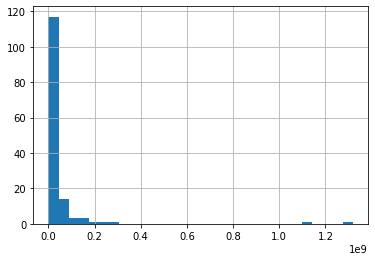

In [81]:
# como se distribuye (histograma) la población por año?
gapminder_2007['population'].hist(bins = 30)

In [ ]:
# Nota: para conocer más sobre las distintas operaciones sobre datos, ver curso de Python

In [ ]:
# preguntas sobre continente

In [ ]:
# cuales continentes hay?
# ejercicio

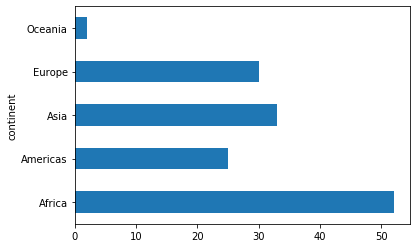

In [26]:
# cuantos paises hay en cada continente para 2007?
gapminder_2007.groupby(['continent']).count()['country'].plot.barh()

In [ ]:
# preguntas sobre life_exp

In [ ]:
# cuales son los minimos y máximos de life_exp para el úlitmo año?
# ejercicio

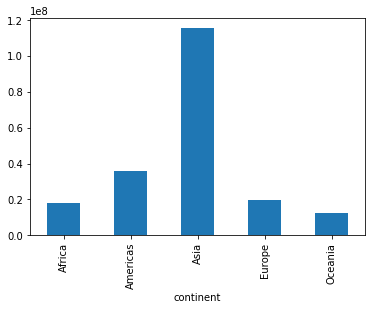

In [37]:
# como se distribuye el promedio de life_exp por continente para el último año?
gapminder_2007.groupby(['continent']).mean()['population'].plot.bar()

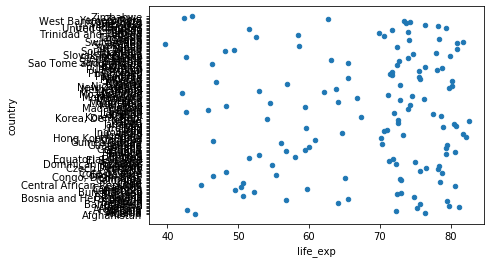

In [68]:
# cual es el life_exp por pais para 2007?
gapminder_2007[['country','life_exp']].plot.scatter(x = 'life_exp', y = 'country')

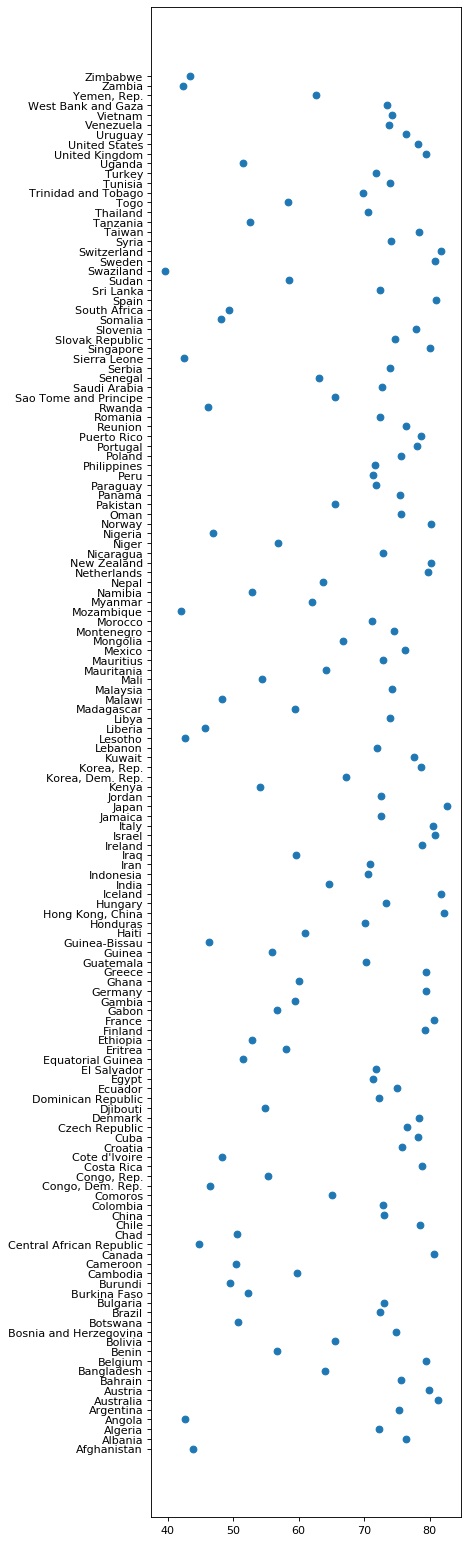

In [67]:
plt.figure(figsize=(5, 25), dpi=80)
plt.scatter(x=gapminder_2007['life_exp'], y=gapminder_2007['country'])

In [ ]:
# preguntas sobre gdp_cap

In [ ]:
# cual es el gdp_cap por pais
# similar a caso anterior

In [72]:
# cual es el gdp_cap por continente
# similar a caso anterior

In [78]:
# como se distribuye gdp per cap para el año 2007 (cuantiles)
gapminder_2007['gdp_cap'].quantile([0,0.25,0.5,0.75,1])

0.00      277.551859
0.25     1624.842248
0.50     6124.371109
0.75    18008.835640
1.00    49357.190170
Name: gdp_cap, dtype: float64

In [81]:
print('min: ', gapminder_2007['gdp_cap'].min())
print('min: ', gapminder_2007['gdp_cap'].median())
print('min: ', gapminder_2007['gdp_cap'].max())

min:  277.55185869999997
min:  6124.3711085
min:  49357.19017


In [101]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

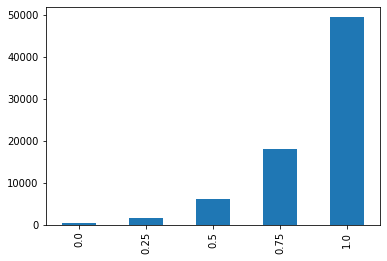

In [103]:
gapminder_2007['gdp_cap'].quantile(np.linspace(0,1,5)).plot.bar()

In [88]:
# otras, buscando relaciones entre las variables
# a mayor life_exp, mayor gdp_cap?
# a mayor poblacion, mayor life_exp?
# a mayor poblacion, mayor gdp_cap?
# a mayor año, mayor life_exp? aumenta life_exp con los años?
# a mayor año, mayor gdp_cap? aumenta gdp_cap con los años?

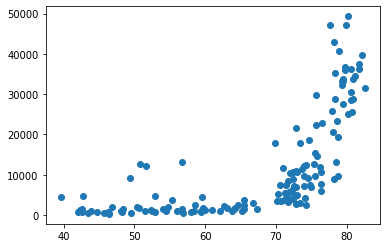

In [105]:
# a mayor life_exp, mayor gdp_cap?
plt.scatter(x=gapminder_2007['life_exp'], y=gapminder_2007['gdp_cap'])

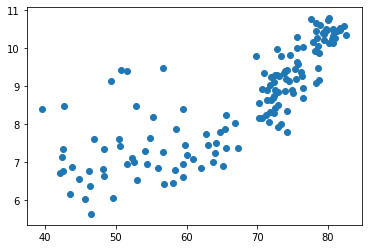

In [107]:
# buscando cambio de variable con logaritmo
plt.scatter(x=gapminder_2007['life_exp'], y=np.log(gapminder_2007['gdp_cap']))